# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16 - Takes a long time to train
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *
from efficientNet import *

change_to_disk()
data_dir = Path("clean_split_1k/")
models_path = Path('Models/')
saves = Path('Trainning_results_saves/')

In [3]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    
    # Rotate the images randomly (just to make it as independent from the position of the pipeline)
    transforms.RandomRotation(180),

    # Random crop
    transforms.RandomCrop(140),

    #Random horizontal flip
    transforms.RandomHorizontalFlip(p=0.5),

    # Turn the image into a torch.Tensor
    transforms.ToTensor(),

    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [4]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 100
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()


loss_fn = nn.CrossEntropyLoss()

In [5]:
#Train ResNet18
resnet18.to(device)
rprop_optim = torch.optim.Rprop(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6459 | train_acc: 0.7113 | validation_loss: 0.6459 | validation_acc: 0.6746
Epoch: 2 | train_loss: 0.5374 | train_acc: 0.7485 | validation_loss: 0.5824 | validation_acc: 0.7270
Epoch: 3 | train_loss: 0.5372 | train_acc: 0.7558 | validation_loss: 0.5834 | validation_acc: 0.7285
Epoch: 4 | train_loss: 0.5285 | train_acc: 0.7635 | validation_loss: 0.5596 | validation_acc: 0.7527


In [ ]:
eval_resnet18_results = eval_model(resnet18, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

In [ ]:
#Train ResNet50
resnet50.to(device)
rprop_optim = torch.optim.Rprop(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7220 | train_acc: 0.6813 | validation_loss: 0.5705 | validation_acc: 0.7453
Epoch: 2 | train_loss: 0.6365 | train_acc: 0.7280 | validation_loss: 0.5707 | validation_acc: 0.7418
Epoch: 3 | train_loss: 0.8959 | train_acc: 0.7240 | validation_loss: 0.7886 | validation_acc: 0.7367
Epoch: 4 | train_loss: 1.8792 | train_acc: 0.7378 | validation_loss: 0.6963 | validation_acc: 0.7445
Epoch: 5 | train_loss: 6.8853 | train_acc: 0.7300 | validation_loss: 1.3845 | validation_acc: 0.7535
Epoch: 6 | train_loss: 7.4491 | train_acc: 0.7375 | validation_loss: 1.9307 | validation_acc: 0.7199
Epoch: 7 | train_loss: 10.2495 | train_acc: 0.7322 | validation_loss: 1.2464 | validation_acc: 0.7535
Epoch: 8 | train_loss: 4.8729 | train_acc: 0.7402 | validation_loss: 2.9262 | validation_acc: 0.7109
Epoch: 9 | train_loss: 22.7785 | train_acc: 0.7440 | validation_loss: 1.2425 | validation_acc: 0.7555
Epoch: 10 | train_loss: 30.1788 | train_acc: 0.7485 | validation_loss: 1.1326 | validatio

In [ ]:
eval_resnet50_results = eval_model(resnet50, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:02<?, ?it/s]

In [ ]:
#Train MobileNet Large
mobnet_lrg.to(device)
rprop_optim = torch.optim.Rprop(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6472 | train_acc: 0.6152 | validation_loss: 1.2623 | validation_acc: 0.6484
Epoch: 2 | train_loss: 2.3587 | train_acc: 0.6522 | validation_loss: 0.9585 | validation_acc: 0.6535
Epoch: 3 | train_loss: 2.5084 | train_acc: 0.6532 | validation_loss: 0.8624 | validation_acc: 0.6402
Epoch: 4 | train_loss: 1.8925 | train_acc: 0.6613 | validation_loss: 1.1848 | validation_acc: 0.6734
Epoch: 5 | train_loss: 2.0490 | train_acc: 0.6550 | validation_loss: 1.2046 | validation_acc: 0.6285
Epoch: 6 | train_loss: 2.2020 | train_acc: 0.6532 | validation_loss: 0.7505 | validation_acc: 0.6770
Epoch: 7 | train_loss: 1.9306 | train_acc: 0.6683 | validation_loss: 1.3068 | validation_acc: 0.6871
Epoch: 8 | train_loss: 1.8868 | train_acc: 0.6520 | validation_loss: 1.0396 | validation_acc: 0.6957
Epoch: 9 | train_loss: 2.0412 | train_acc: 0.6552 | validation_loss: 0.9893 | validation_acc: 0.6789
Epoch: 10 | train_loss: 1.9076 | train_acc: 0.6743 | validation_loss: 1.3044 | validation_a

In [ ]:
eval_mobnet_lrg_results = eval_model(mobnet_lrg, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:01<?, ?it/s]

In [ ]:
#Train MobileNet Small
mobnet_sml.to(device)
rprop_optim = torch.optim.Rprop(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1744 | train_acc: 0.5968 | validation_loss: 0.9612 | validation_acc: 0.6520
Epoch: 2 | train_loss: 1.9647 | train_acc: 0.6435 | validation_loss: 0.9405 | validation_acc: 0.6402
Epoch: 3 | train_loss: 1.8584 | train_acc: 0.6372 | validation_loss: 0.9598 | validation_acc: 0.6617
Epoch: 4 | train_loss: 1.6056 | train_acc: 0.6335 | validation_loss: 0.8300 | validation_acc: 0.6617
Epoch: 5 | train_loss: 2.0332 | train_acc: 0.6302 | validation_loss: 1.0337 | validation_acc: 0.6687
Epoch: 6 | train_loss: 2.2907 | train_acc: 0.6380 | validation_loss: 0.7483 | validation_acc: 0.6371
Epoch: 7 | train_loss: 2.4378 | train_acc: 0.6182 | validation_loss: 0.8446 | validation_acc: 0.6391
Epoch: 8 | train_loss: 1.9101 | train_acc: 0.6442 | validation_loss: 1.3227 | validation_acc: 0.6680
Epoch: 9 | train_loss: 2.0216 | train_acc: 0.6368 | validation_loss: 0.7263 | validation_acc: 0.6766
Epoch: 10 | train_loss: 1.7389 | train_acc: 0.6422 | validation_loss: 0.9292 | validation_a

In [ ]:
eval_mobnet_sml_results = eval_model(mobnet_sml, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

  0%|          | 0/16 [00:01<?, ?it/s]

In [13]:
#Train EfficientNetV3 B0
# effnetb0.to(device)
# rprop_optim = torch.optim.Rprop(params=effnetb0.parameters(), lr=lr)
# train_effnetb0_results, train_time_effnetb0 = train(effnetb0, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

In [14]:
#eval_effnetb0_results = eval_model(effnetb0, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

In [15]:
#Train EfficientNetV3 B5
#effnetb5.to(device)
#rprop_optim = torch.optim.Rprop(params=effnetb5.parameters(), lr=lr)
#train_effnetb5_results, train_time_effnetb5 = train(effnetb5, train_dl, validation_dl, optimizer=rprop_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

In [16]:
#eval_effnetb5_results = eval_model(effnetb5, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))

(None, None)

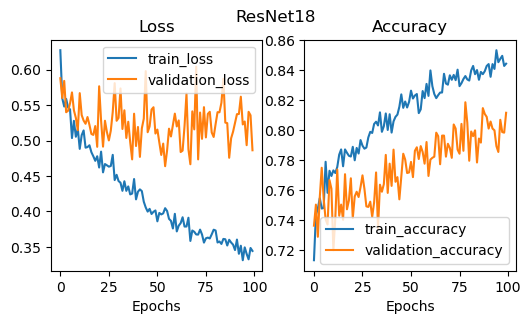

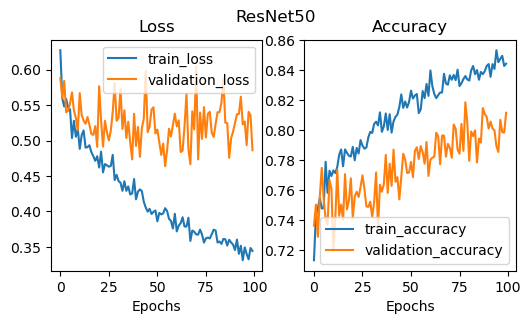

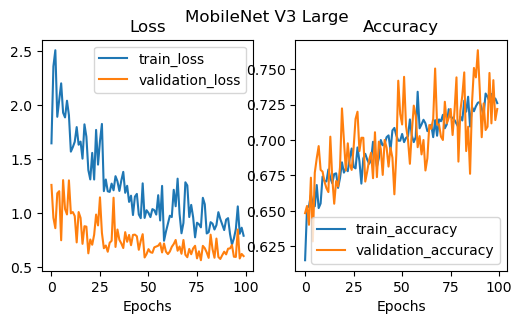

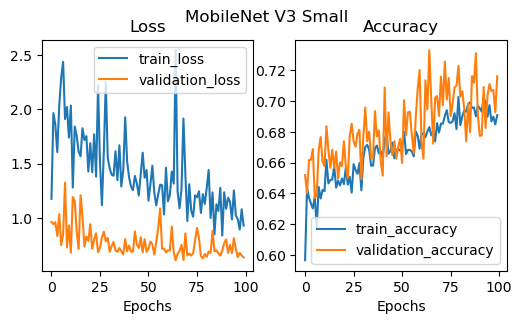

In [ ]:
plot_loss_curves(train_resnet18_results,"ResNet18"), plot_loss_curves(train_resnet18_results,"ResNet50"),
plot_loss_curves(train_mobnet_lrg_results,"MobileNet V3 Large"), plot_loss_curves(train_mobnet_sml_results,"MobileNet V3 Small")
#plot_loss_curves(train_effnetb0_results,"EfficientNet B0"), plot_loss_curves(train_effnetb5_results,"EfficientNet B5"),

(None, None)

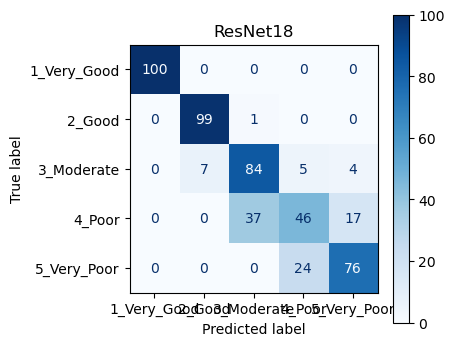

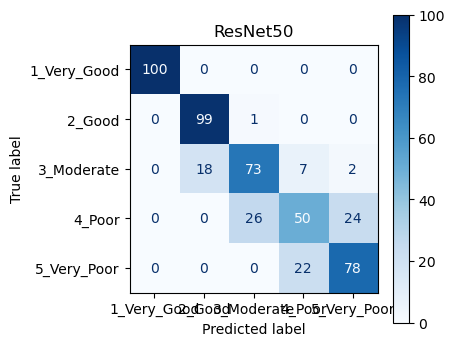

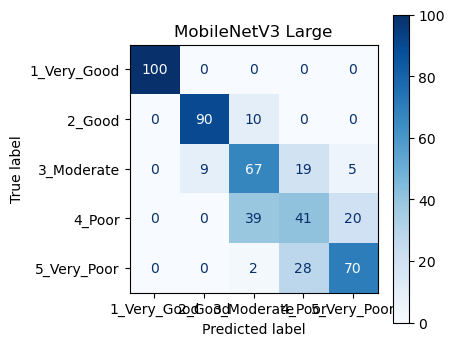

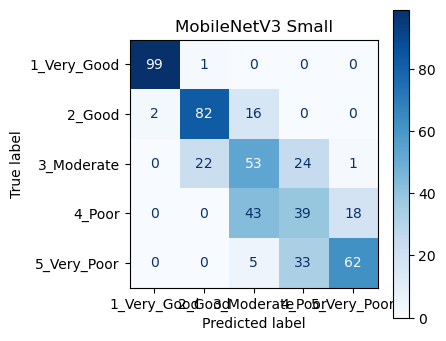

In [ ]:
plot_confusion_matrix(resnet18,test_dl,device,class_names, "ResNet18"), plot_confusion_matrix(resnet50, test_dl, device, class_names, "ResNet50"),
plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names, "MobileNetV3 Large"), plot_confusion_matrix(mobnet_sml, test_dl, device, class_names, "MobileNetV3 Small")
#plot_confusion_matrix(effnetb0,test_dl,device,class_names, "EfficientNet B0"), plot_confusion_matrix(effnetb5, test_dl, device, class_names, "EfficientNet B5")


In [ ]:
all_results = pd.DataFrame([
    eval_resnet18_results,
    eval_resnet50_results,
    eval_mobnet_sml_results,
    eval_mobnet_lrg_results,
    #eval_effnetb0_results,
    #eval_effnetb5_results
    ])

In [ ]:
all_results['train_time'] = pd.DataFrame([
    train_time_resnet18,
    train_time_resnet50,
    train_time_mobnet_lrg,
    train_time_mobnet_sml,
    #train_time_effnetb0,
    #train_time_effnetb5
])

In [ ]:
all_results

,model_name,model_loss,model_acc,model_inf_time,train_time
0,ResNet,0.447825,80.390625,23.522030,10053.158353
1,ResNet,6.494519,80.507812,69.835391,8535.865642
2,MobileNetV3,0.774607,67.382812,24.124674,7159.366241
3,MobileNetV3,0.590266,75.742188,22.235200,6900.437147


In [22]:
model_name_resnet18 = 'ResNet18_1000_class_100_epoch.pth'
model_name_resnet50 = 'ResNet50_1000_class_100_epoch.pth'
model_name_mobnet_lrg = 'Mobnet_lrg_1000_class_100_epoch.pth'
model_name_mobnet_sml = 'Mobnet_sml_1000_class_100_epoch.pth'
model_name_effnetb0 = 'EffNet_B0_1000_class_100_epoch.pth'
model_name_effnetb5 = 'EffNet_B5_1000_class_100_epoch.pth'

save_model(models_path, model_name_resnet18, resnet18)
save_model(models_path, model_name_resnet50, resnet50)
save_model(models_path, model_name_mobnet_lrg, mobnet_lrg)
save_model(models_path, model_name_mobnet_sml, mobnet_sml)
#save_model(models_path, model_name_effnetb0, effnetb0)
#save_model(models_path, model_name_effnetb5, effnetb5)

resnet18_all_results = [eval_resnet18_results, train_resnet18_results, train_time_resnet18]
resnet50_all_results = [eval_resnet50_results, train_resnet50_results, train_time_resnet50]
mobnet_lrg_all_results = [eval_mobnet_lrg_results, train_mobnet_lrg_results, train_time_mobnet_lrg]
mobnet_sml_all_results = [eval_mobnet_sml_results, train_mobnet_sml_results, train_time_mobnet_sml]
#effnetb0_all_results = [eval_effnetb0_results, train_effnetb0_results, train_time_effnetb0]
#effnetb5_all_results = [eval_effnetb5_results, train_effnetb5_results, train_time_effnetb5]

name_results_resnet18 = 'resnet18_results.npy'
name_results_resnet50 = 'resnet50_results.npy'
name_results_mobnet_lrg = 'mobnet_lrg_results.npy'
name_results_mobnet_sml = 'mobnet_sml_results.npy'
name_results_effnetb0 = 'effnetb0_results.npy'
name_results_effnetb5 = 'effnetb5_results.npy'

pth = saves / name_results_resnet18
np.save(pth,resnet18_all_results)

pth = saves / name_results_resnet50
np.save(pth,resnet50_all_results)

pth = saves / name_results_mobnet_lrg
np.save(pth,mobnet_lrg_all_results )

pth = saves / name_results_mobnet_sml
np.save(pth,mobnet_sml_all_results)

# pth = saves / name_results_effnetb0
# np.save(pth,effnetb0_all_results )

# pth = saves / name_results_effnetb5
# np.save(pth,effnetb5_all_results )

Saving the model to: Models\ResNet18_1000_class_100_epoch.pth
Saving the model to: Models\ResNet50_1000_class_100_epoch.pth
Saving the model to: Models\Mobnet_lrg_1000_class_100_epoch.pth
Saving the model to: Models\Mobnet_sml_1000_class_100_epoch.pth
